## Visual Representation of Convolutional Models Used in the Paper

In [36]:
#Keras Related
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, Input, ZeroPadding2D, InputLayer
from tensorflow.keras import models, layers, optimizers
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
from keras.optimizers import adam_v2
from keras.models import Sequential
import tensorflow as tf
import tensorflow.keras

#For Visualization
import visualkeras
from PIL import ImageFont

## Visual Representation of MobileNet V2

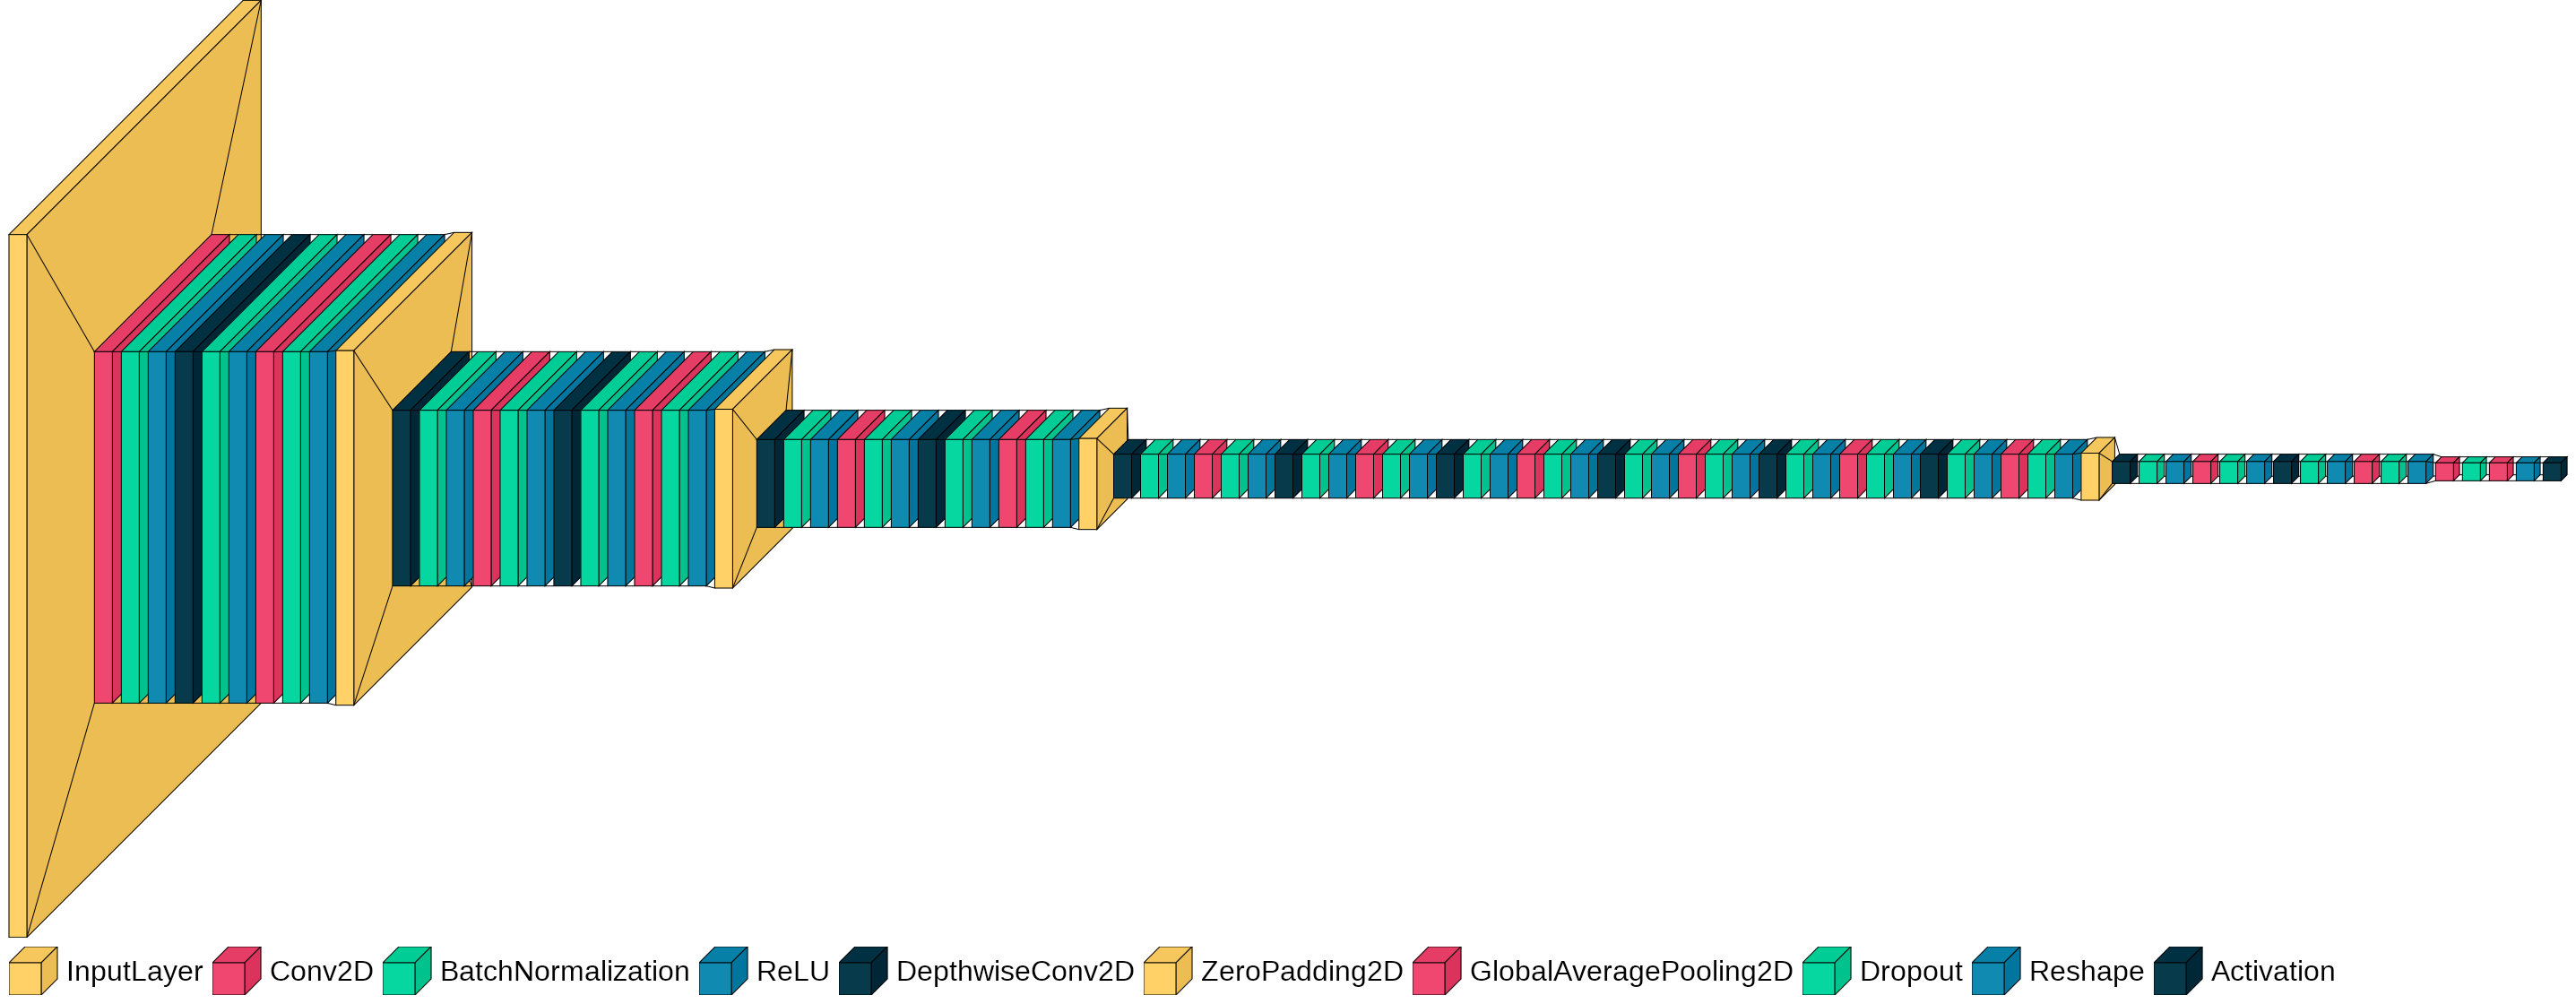

In [20]:
font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf", 32)

visualkeras.layered_view(tf.keras.applications.MobileNet(), legend = True, scale_xy=3.5, scale_z=0.0000001, max_z=100, spacing=10, font=font)

## Visual Representation of Tailored CNN
Noticeably, InputLayer and ZeroPadding2D are not present in the tailored CNN used for training, their presence here ensures the display of an input layer and is justified by consistency with the other images. 

In [41]:
def SNN():
    model = Sequential()
        
    # Input layer.
    
    model.add(InputLayer(input_shape = (112, 112, 3)))
    model.add(ZeroPadding2D((1, 1)))
    
    model.add(Conv2D(filters = 32, 
                     kernel_size = (3,3), 
                     padding = 'same',
                     activation = tf.keras.layers.LeakyReLU(alpha = 0.4) 
                     ))

    # Stacked convolutional layers.
    
    model.add(Conv2D(32, (3,3), padding = 'same', activation = tf.keras.layers.LeakyReLU(alpha = 0.4)))
    model.add(Conv2D(32, (3,3), padding = 'same', activation = tf.keras.layers.LeakyReLU(alpha = 0.4)))
    model.add(MaxPooling2D((2,2))) 
    model.add(Dropout(0.6))

    model.add(Conv2D(64, (3,3), padding = 'same', activation = tf.keras.layers.LeakyReLU(alpha = 0.4)))
    model.add(Conv2D(64, (3,3), padding = 'same', activation = tf.keras.layers.LeakyReLU(alpha = 0.4)))
    model.add(Conv2D(64, (3,3), padding = 'same', activation = tf.keras.layers.LeakyReLU(alpha = 0.4)))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.6))

    model.add(Conv2D(128, (3,3), padding = 'same', activation = tf.keras.layers.LeakyReLU(alpha = 0.4)))
    model.add(Conv2D(128, (3,3), padding = 'same', activation = tf.keras.layers.LeakyReLU(alpha = 0.4)))
    model.add(Conv2D(128, (3,3), padding = 'same', activation = tf.keras.layers.LeakyReLU(alpha = 0.4))) 
    model.add(MaxPooling2D((4,4)))
    model.add(Dropout(0.6))

    # Fully-connected layers.
    
    model.add(Flatten())
    model.add(Dense(512, activation = tf.keras.layers.LeakyReLU(alpha = 0.4)))
    model.add(Dense(512, activation = tf.keras.layers.LeakyReLU(alpha = 0.4)))
    model.add(Dropout(0.8))
    model.add(Dense(15))   

    return model


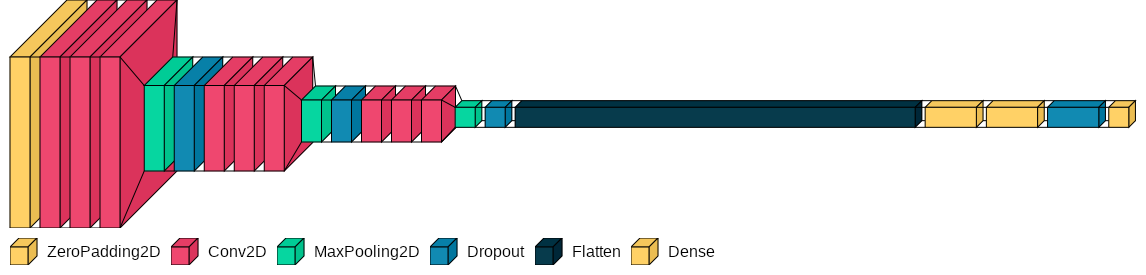

In [44]:
font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf", 32)

visualkeras.layered_view(SNN(), spacing = 10, legend = True, scale_xy=1.5, scale_z=0.1, font = font)

## Visual Representation of VGG19

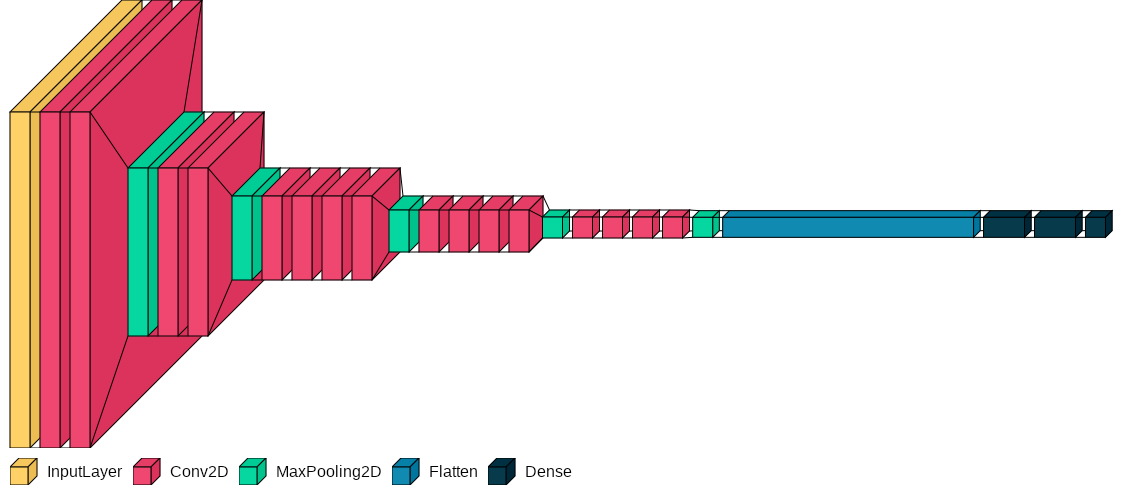

In [15]:
font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf", 16)

visualkeras.layered_view(tf.keras.applications.VGG19(), spacing = 10, legend = True, scale_xy=1.5, scale_z=0.01, font = font)


## Visual Representation of Baseline CNN
Again, the InputLayer and the ensuing ZeroPadding2D layer are not present in the baseline CNN used for training and evaluation. Nonetheless, they have been inserted here to create the visual equivalent of an input layer, in consistency with former depictions. 

In [ ]:
def simple_cnn():
    model = Sequential()
    model.add(InputLayer(input_shape = (112, 112, 3)))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(32,                                                # Number of kernels/filters.
                     kernel_size = (3,3),                               # Size of the kernels/filters.
                     activation = 'relu',                               # Activation function.
                     padding = 'same',
                     strides = 1))   
    model.add(layers.MaxPool2D(2,2))

    model.add(layers.Conv2D(64, (3,3), activation = 'relu')) 
    model.add(layers.MaxPool2D(2,2))

    model.add(layers.Conv2D(128, (3,3), activation = 'relu')) 
    model.add(layers.MaxPool2D(2,2))
    
    model.add(Flatten())
    model.add(layers.Dense(128, activation = 'relu')) 
    model.add(layers.Dense(15, activation = 'softmax')) # Because we have 3 categories.

    model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy']) 

    return model

In [ ]:
font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf", 16)

visualkeras.layered_view(simple_cnn(), spacing = 10, legend = True, scale_xy=1.5, scale_z=0.5, font = font)